In [1]:

"""
There're three types of gaps

1. Normal gaps. The gap usually closes in a few days.
2. Breakthrough gaps. When price and volumn gaps, usually forming a new trend
3. Exhaustion Gap. Usually market is going to violently fluctuate in price

Defination of Gap for this strategy

If upward trend, the today's lowest price is higher than yesterday's closing price, by at least a threshold
If downward trend, the today's highest price is lower than yesterday's closing price, by at least a threshold
 
This would indicate that this gap has strong support or resistance.

First, let's define threshold as 3% of medium of close prices
"""

import pandas as pd
import numpy as np

amex_df = pd.read_csv('./gen/amex_df.csv',
                           parse_dates=True,
                           index_col=0)
p_gap_threshold = 0.01 # Input 1, p_gap_threshold, or percentage of closing price medium as gap
gap_threshold = amex_df.close.median() * p_gap_threshold
gap_threshold

0.9825

In [6]:

"""
Use for loop to loop through each day, and find gaps.
gap: direction
gap_strength: Power of the gapping
"""
gap_pd = pd.DataFrame()

def judge_gap(today):
    global gap_pd
    if today.p_change > 0 and \
        (today.low - today.pre_close) > gap_threshold:
        today['gap'] = 1
        today['gap_strength'] = (today.low - today.pre_close) / gap_threshold
        gap_pd = gap_pd.append(today)
    elif today.p_change < 0 and \
        (today.pre_close - today.high) > gap_threshold:
        today['gap'] = -1
        today['gap_strength'] = (today.pre_close - today.high) / gap_threshold
        gap_pd = gap_pd.append(today)
    else:
        pass
        
for kl_index in np.arange(0, amex_df.shape[0]):
    today = amex_df.iloc[kl_index]
    judge_gap(today)
    
    
gap_pd.filter(['gap',
               'gap_strength',
               'close',
               'date',
               'p_change',
               'pre_close'])

,gap,gap_strength,close,date,p_change,pre_close
2018-03-22,-1.0,1.3740,91.41,2.0180e+07,-4.092,95.31
2018-05-29,-1.0,1.2824,97.72,2.0181e+07,-3.343,101.10
2018-07-19,-1.0,1.6387,100.17,2.0181e+07,-2.729,102.98
2018-10-01,1.0,1.1399,107.90,2.0181e+07,1.324,106.49
2018-10-19,1.0,1.2417,106.73,2.0181e+07,3.783,102.84
2018-11-20,-1.0,1.5471,106.10,2.0181e+07,-2.990,109.37
2018-11-26,1.0,1.1094,109.68,2.0181e+07,3.726,105.74
2018-12-12,1.0,1.1196,107.48,2.0181e+07,1.973,105.40


In [3]:

# A more elegant way of writing the above for loop

gap_pd = pd.DataFrame()
amex_df.apply(judge_gap, axis=1)

2017-06-05    None
2017-06-06    None
2017-06-07    None
2017-06-08    None
2017-06-09    None
2017-06-12    None
2017-06-13    None
2017-06-14    None
2017-06-15    None
2017-06-16    None
2017-06-19    None
2017-06-20    None
2017-06-21    None
2017-06-22    None
2017-06-23    None
2017-06-26    None
2017-06-27    None
2017-06-28    None
2017-06-29    None
2017-06-30    None
2017-07-03    None
2017-07-05    None
2017-07-06    None
2017-07-07    None
2017-07-10    None
2017-07-11    None
2017-07-12    None
2017-07-13    None
2017-07-14    None
2017-07-17    None
              ... 
2018-11-15    None
2018-11-16    None
2018-11-19    None
2018-11-20    None
2018-11-21    None
2018-11-23    None
2018-11-26    None
2018-11-27    None
2018-11-28    None
2018-11-29    None
2018-11-30    None
2018-12-03    None
2018-12-04    None
2018-12-06    None
2018-12-07    None
2018-12-10    None
2018-12-11    None
2018-12-12    None
2018-12-13    None
2018-12-14    None
2018-12-17    None
2018-12-18  

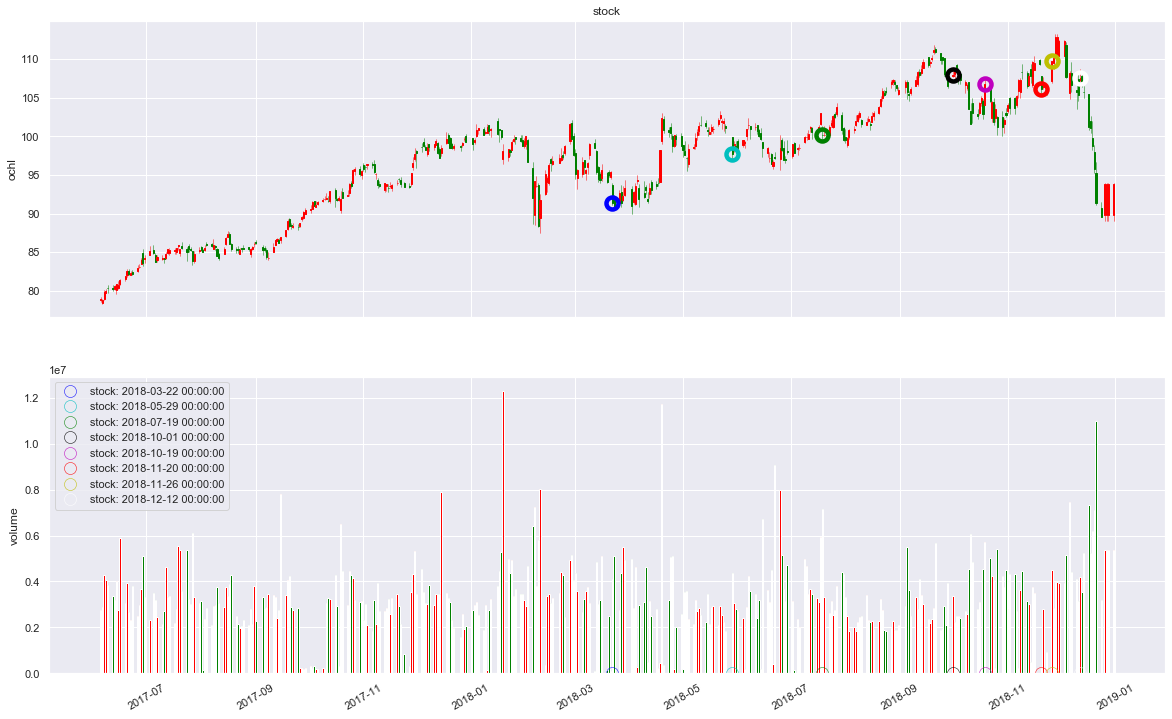

In [7]:

from abupy import ABuMarketDrawing

ABuMarketDrawing.plot_candle_form_klpd(amex_df,
                                       view_indexs=gap_pd.index)

In [ ]:

# TODO Apply Trading Strategy 